# **Data Preprocessing**

In [114]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.util import plot_model

ModuleNotFoundError: No module named 'keras.util'

In [ ]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# importing dataset
data = pd.read_csv('/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt',header=None, names=col_names)
#data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)

In [ ]:
# print dataset
data

In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

In [ ]:
# descriptive statistics of dataset
data.describe()

In [ ]:
# number of attack labels 
data['label'].value_counts()

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
# calling change_label() function
change_label(data)

In [ ]:
# distribution of attack classes
data.label.value_counts()

# **Data Normalization**

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

# **One-hot-encoding**

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

# **Binary Classification**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
np.save("labels/le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
# dataset with binary labels and label encoded column
bin_data.head()

In [ ]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

# **Multi-class Classification**

In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [ ]:
np.save("labels/le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **Feature Extraction**

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data.to_csv("./datasets/bin_data.csv")
# final dataset for binary classification
bin_data

In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [115]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [116]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [117]:
# saving final dataset to disk
multi_data.to_csv('./datasets/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


# **Linear Support Vector Machine Classifier (Binary Classification)**

In [118]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [119]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [120]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [121]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [122]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266


In [123]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [124]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03302216295167333
Mean Squared Error -  0.03302216295167333
Root Mean Squared Error -  0.1817200125238641
R2 Score -  86.74560396265441
Accuracy -  96.69778370483266


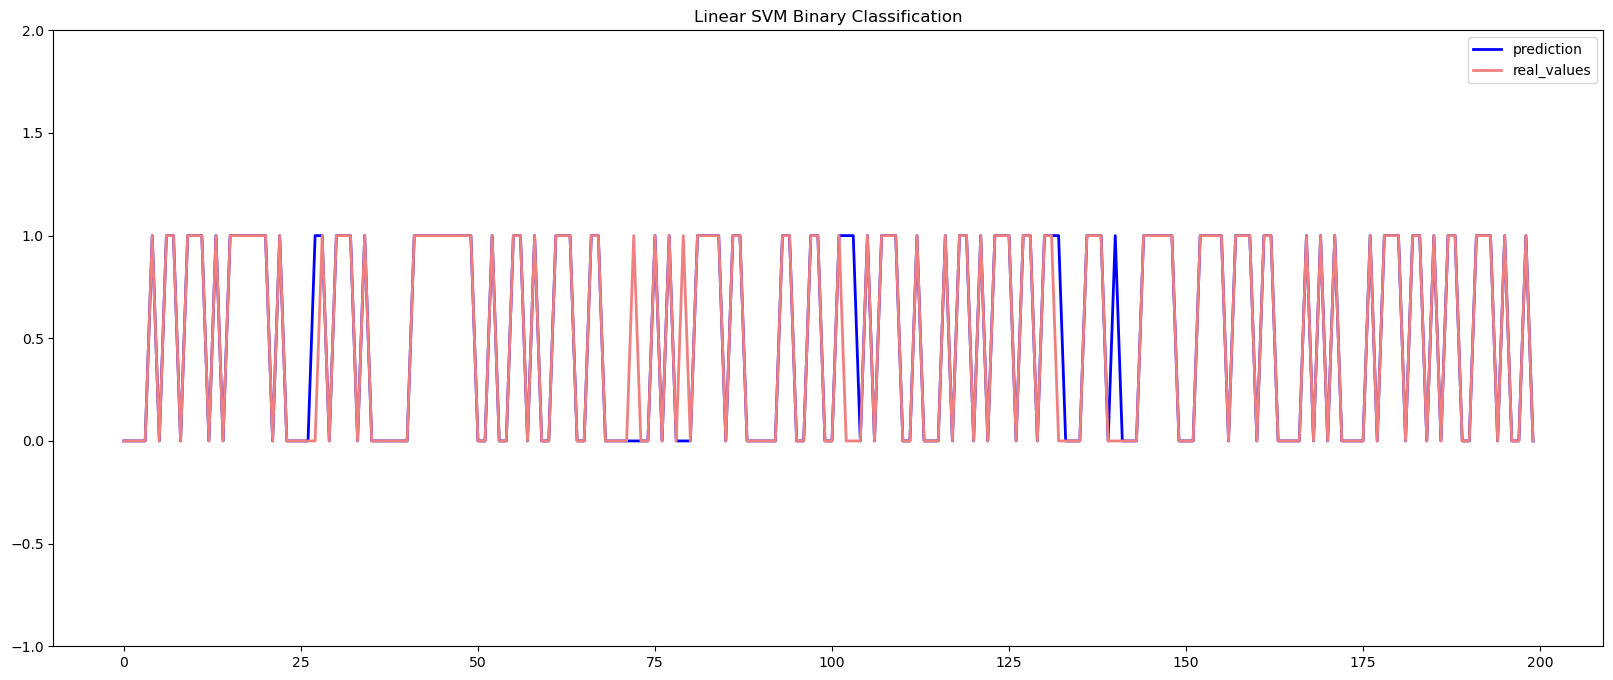

In [125]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear SVM Binary Classification")
plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [126]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [127]:
pkl_filename = "./models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [128]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [129]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



In [130]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.04289705975741411
Mean Squared Error -  0.04289705975741411
Root Mean Squared Error -  0.20711605383797296
R2 Score -  83.24290009836652
Accuracy -  95.71029402425859


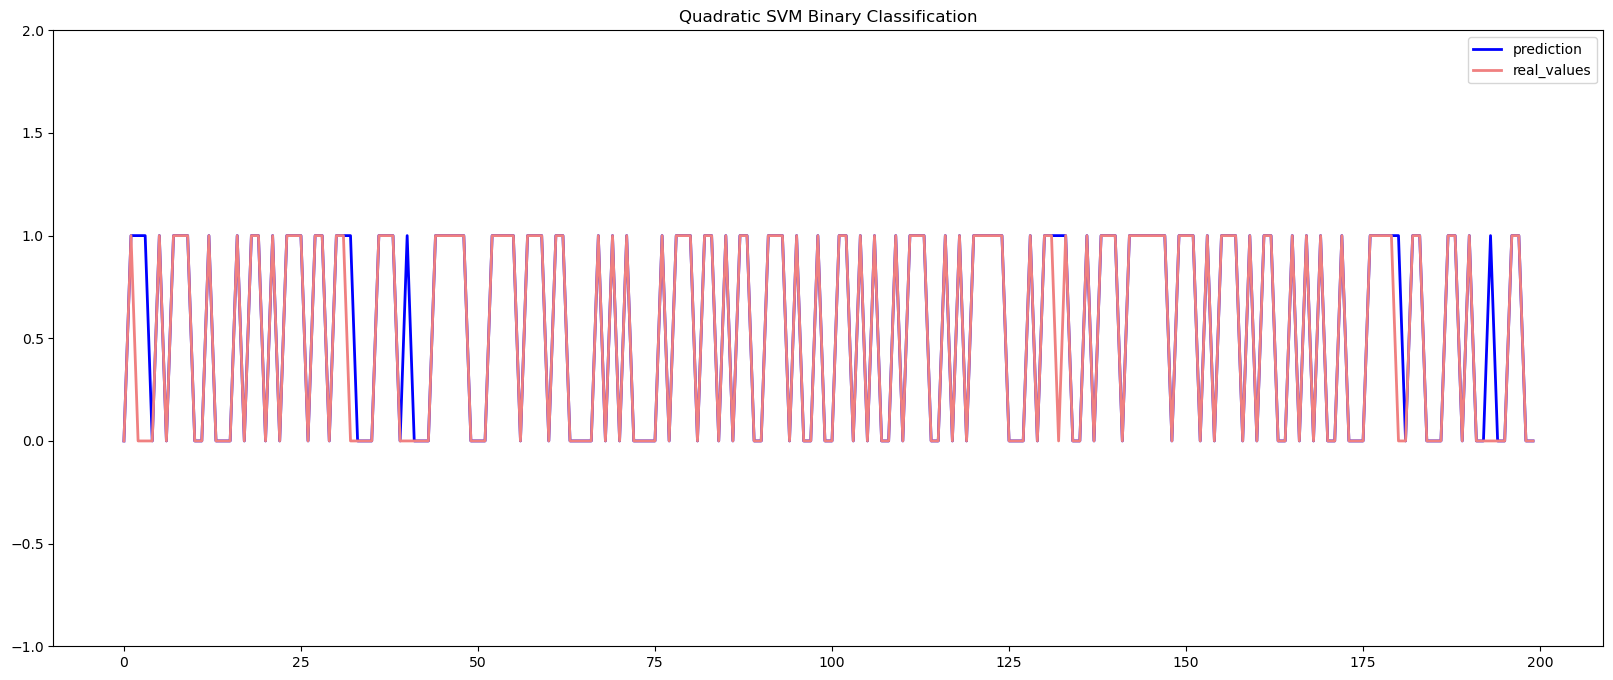

In [131]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.savefig('plots/qsvm_real_pred_bin.png')
plt.show()

# **K-nearest-neighbor Classifier (Binary Classification)**

In [132]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [133]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [134]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.5552803708643


In [135]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [136]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.014447196291357083
Mean Squared Error -  0.014447196291357083
Root Mean Squared Error -  0.12019649034542183
R2 Score -  94.19677669828046
Accuracy -  98.5552803708643


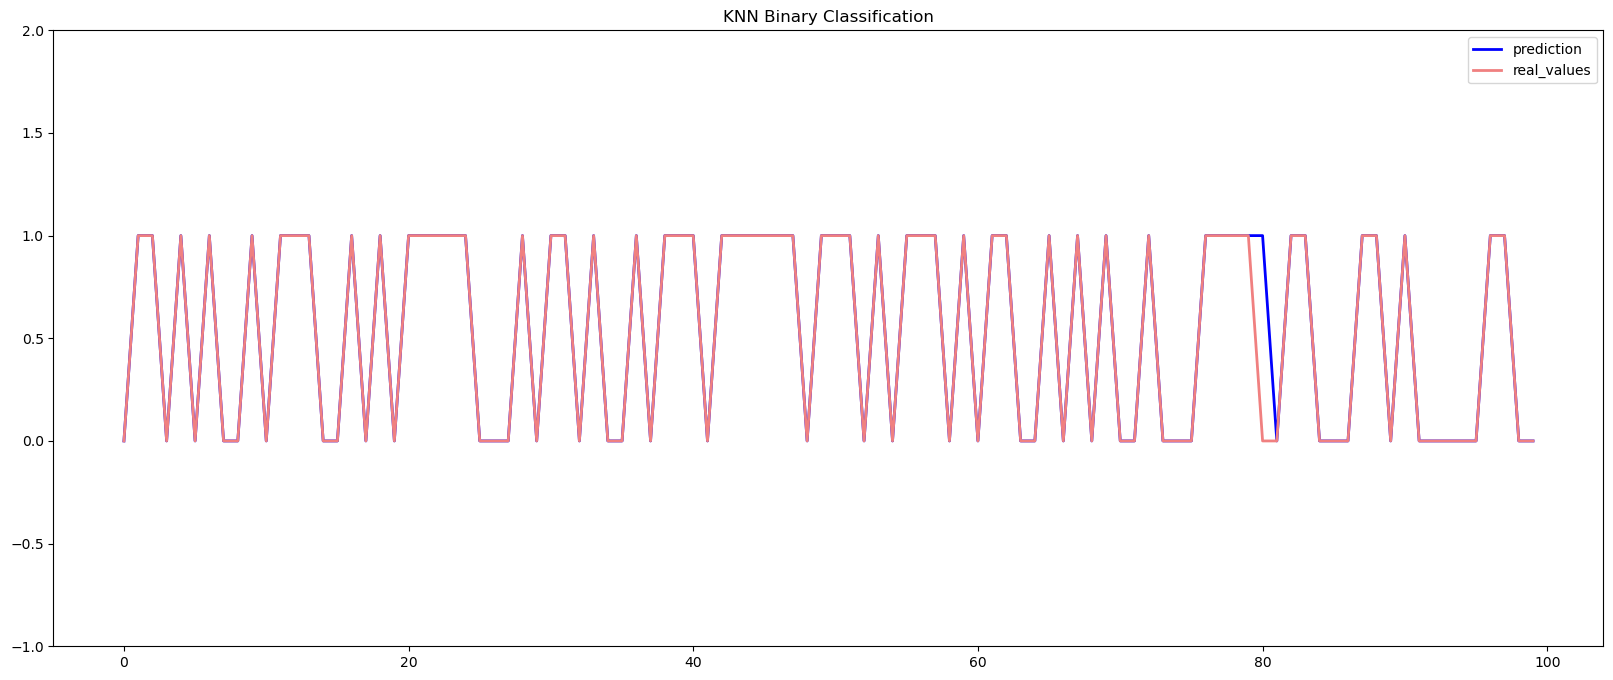

In [137]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.savefig('plots/knn_real_pred_bin.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [138]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [139]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [140]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [141]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [142]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03292690671238966
Mean Squared Error -  0.03292690671238966
Root Mean Squared Error -  0.1814577270671868
R2 Score -  86.8001441639753
Accuracy -  96.70730932876104


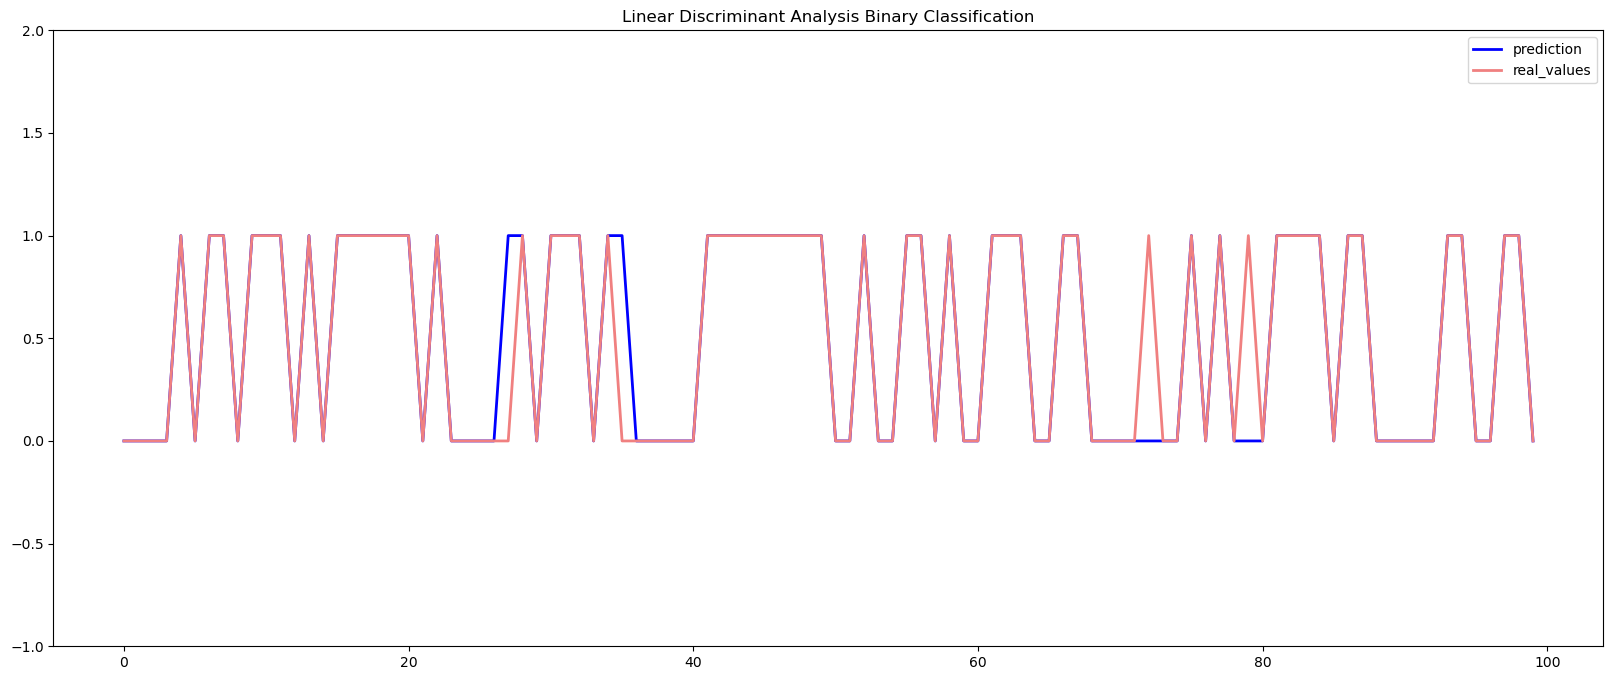

In [143]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
plt.savefig('plots/lda_real_pred_bin.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [144]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

C:\Users\Aswin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [145]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [146]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  68.5241633326983


In [147]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.49     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.66      0.63     31494
weighted avg       0.80      0.69      0.64     31494



In [148]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.3147583666730171
Mean Squared Error -  0.3147583666730171
Root Mean Squared Error -  0.5610333026416677
R2 Score -  13.212850681826438
Accuracy -  68.5241633326983


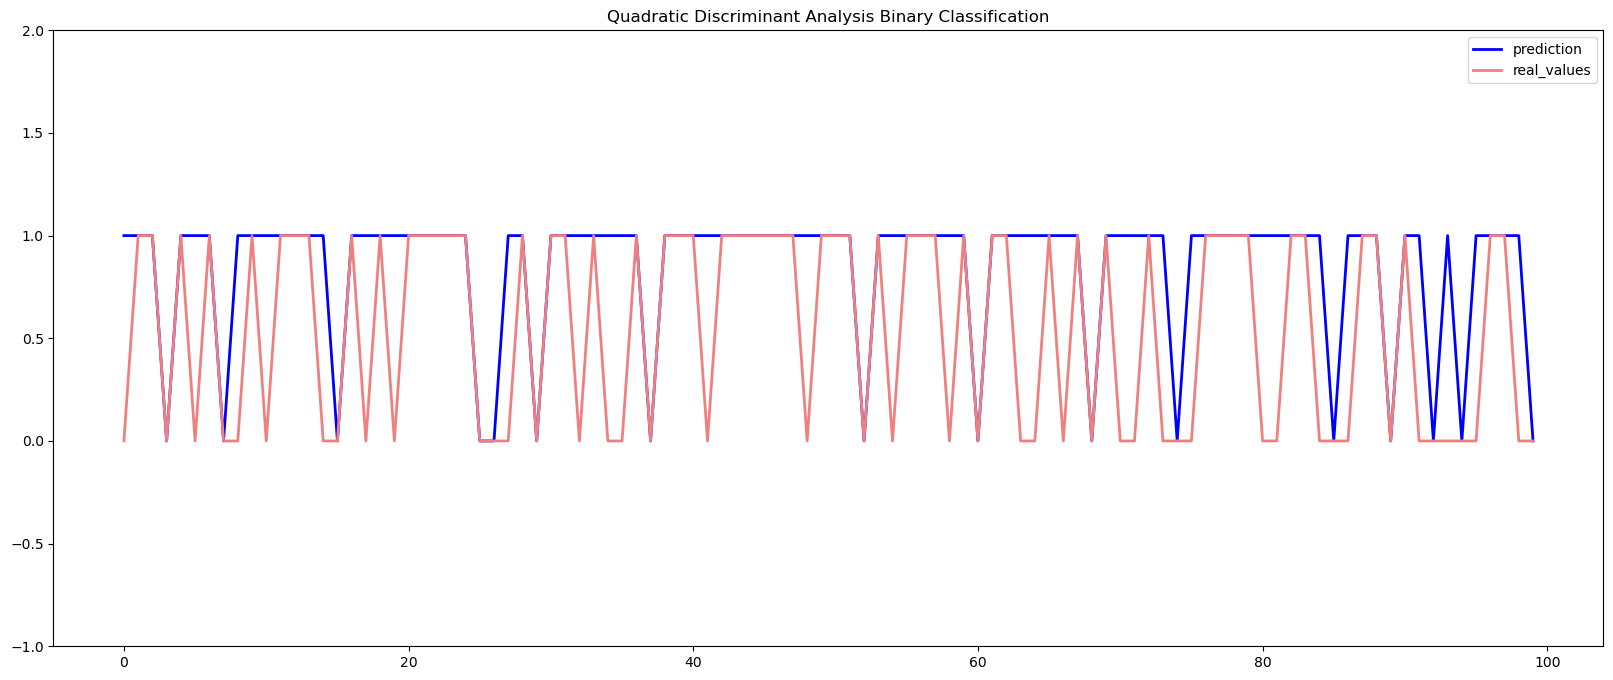

In [149]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic Discriminant Analysis Binary Classification")
plt.savefig('plots/qda_real_pred_bin.png')
plt.show()

# **Multi Layer Perceptron Classifier (Binary Classification)**

In [150]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [151]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [152]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

C:\Users\Aswin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [154]:
# summary of model layers
mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,751 (18.56 KB)

 Trainable params: 4,751 (18.56 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7727 - loss: 0.5735 - val_accuracy: 0.8734 - val_loss: 0.4179
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8778 - loss: 0.3849 - val_accuracy: 0.8963 - val_loss: 0.3002
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8990 - loss: 0.2816 - val_accuracy: 0.9212 - val_loss: 0.2356
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9261 - loss: 0.2234 - val_accuracy: 0.9461 - val_loss: 0.1985
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9479 - loss: 0.1898 - val_accuracy: 0.9541 - val_loss: 0.1749
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9563 - loss: 0.1682 - val_accuracy: 0.9599 - val_loss: 0.1590
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1541 - val_accuracy: 0.9628 - val_loss: 0.1475
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 0.1449 - val_accuracy: 0.9640 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9759 - loss: 0.0718 - val_accuracy: 0.9747 - val_loss: 0.0731
Epoch 52/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0697 - val_accuracy: 0.9747 - val_loss: 0.0728
Epoch 53/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9763 - loss: 0.0702 - val_accuracy: 0.9751 - val_loss: 0.0725
Epoch 54/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0694 - val_accuracy: 0.9751 - val_loss: 0.0722
Epoch 55/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0682 - val_accuracy: 0.9753 - val_loss: 0.0720
Epoch 56/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9772 - loss: 0.0705 - val_accuracy: 0.9752 - val_loss: 0.0717
Epoch 57/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0698 - val_accuracy: 0.9752 - val_loss: 0.0714
Epoch 58/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.0685 - val_accuracy: 0.9754 - val_lo

In [156]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [157]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9770 - loss: 0.0667
Test results - Loss: 0.06354537606239319 - Accuracy: 97.8186309337616


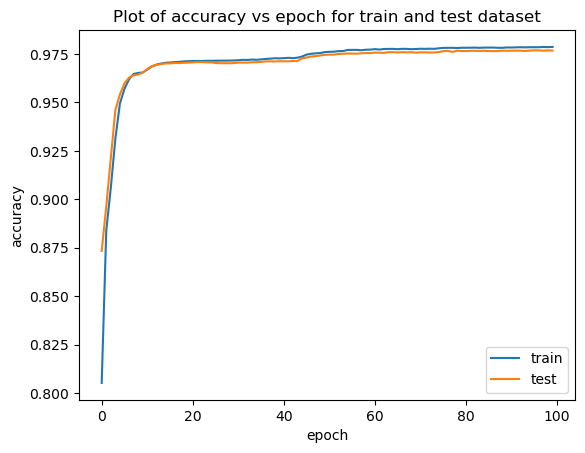

In [159]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

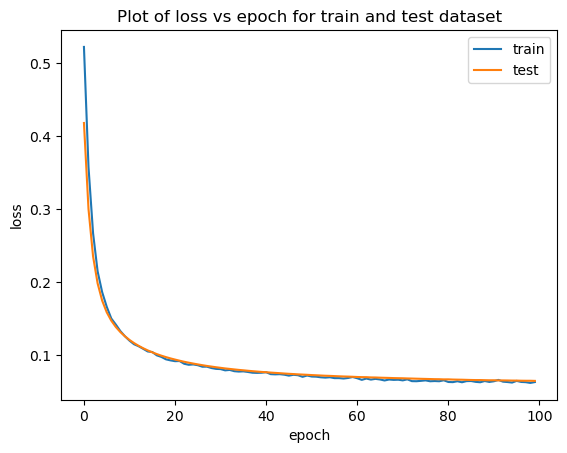

In [160]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [161]:
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [162]:
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step


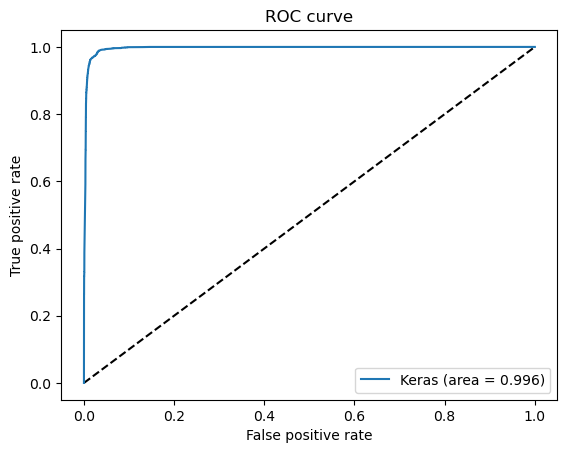

In [163]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('plots/mlp_binary_roc.png')
plt.show()

In [164]:
pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step


In [165]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9869440801240015
F1 Score -  0.97967275201941
Precision Score -  0.9725077835869118


# **Long Short-Term Memory Classifier (Binary Classification)**

In [166]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']] # target attribute

In [167]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [168]:
X_train = X_train.values

In [169]:
y_train = np.array(y_train)

In [170]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [171]:
x_train.shape

(94479, 1, 93)

In [172]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=93))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

C:\Users\Aswin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 93)

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

In [173]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

ValueError: You must call `compile()` before using the model.

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# load json and create model
json_file = open(filepath, 'r')
loaded_model_json = json_file.read()
json_file.close()
lst = model_from_json(loaded_model_json)

# load weights into new model
lst.load_weights(weightspath)
print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

In [ ]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)

In [ ]:
y_test.shape

In [ ]:
y_pred = lst.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('plots/lstm_binary_roc.png')
plt.show()

In [ ]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [ ]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

# **Auto Encoder Classifier (Binary Classification)**

In [174]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [175]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [176]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [177]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [178]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [179]:
# summary of model layers
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 93)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 93)                  │           4,743 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,443 (36.89 KB)

 Trainable params: 9,443 (36.89 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1164 - loss: 0.1208 - val_accuracy: 0.4317 - val_loss: 0.1062
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5296 - loss: 0.1055 - val_accuracy: 0.6974 - val_loss: 0.1051
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6960 - loss: 0.1048 - val_accuracy: 0.7046 - val_loss: 0.1049
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7221 - loss: 0.1045 - val_accuracy: 0.7797 - val_loss: 0.1048
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.1045 - val_accuracy: 0.7999 - val_loss: 0.1047
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8154 - loss: 0.1043 - val_accuracy: 0.8042 - val_loss: 0.1047
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8276 - loss: 0.1043 - val_accuracy: 0.8580 - val_loss: 0.1047
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8484 - loss: 0.1044 - val_accu

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9089 - loss: 0.1041 - val_accuracy: 0.9274 - val_loss: 0.1046
Epoch 52/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9048 - loss: 0.1041 - val_accuracy: 0.9130 - val_loss: 0.1046
Epoch 53/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9065 - loss: 0.1045 - val_accuracy: 0.9421 - val_loss: 0.1046
Epoch 54/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9117 - loss: 0.1042 - val_accuracy: 0.9382 - val_loss: 0.1046
Epoch 55/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9103 - loss: 0.1043 - val_accuracy: 0.9546 - val_loss: 0.1046
Epoch 56/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9129 - loss: 0.1042 - val_accuracy: 0.8936 - val_loss: 0.1046
Epoch 57/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9103 - loss: 0.1043 - val_accuracy: 0.9179 - val_loss: 0.1046
Epoch 58/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9130 - loss: 0.1043 - val_accuracy:

In [181]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [182]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [183]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.1044
Test results - Loss: 0.10456154495477676 - Accuracy: 0.9329078793525696%


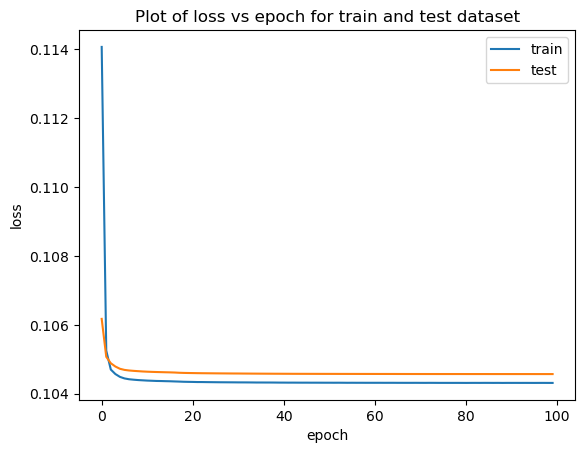

In [184]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

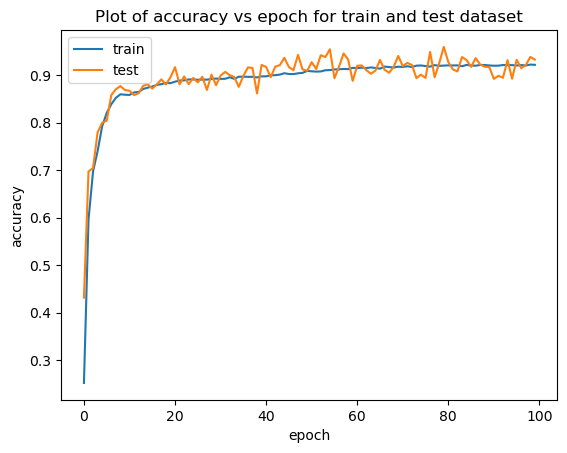

In [185]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

In [186]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [187]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [188]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [189]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104569,0.532609
std,0.043572,0.498943
min,0.040626,0.000000
25%,0.074506,0.000000
50%,0.083821,1.000000
75%,0.151405,1.000000
max,0.229789,1.000000


In [190]:
predictions.shape

(31494, 93)

## **AE Classifier**

In [191]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
fvector = Dense(50, activation="sigmoid")(i_layer)                    
#doutput layer
o_layer = Dense(1, activation='sigmoid')(fvector)

In [192]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [193]:
# summary of model layers
ae_classifier.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 93)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,751 (18.56 KB)

 Trainable params: 4,751 (18.56 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5376 - loss: 0.6925 - val_accuracy: 0.7254 - val_loss: 0.6597
Epoch 2/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.6503 - val_accuracy: 0.8616 - val_loss: 0.6230
Epoch 3/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8597 - loss: 0.6120 - val_accuracy: 0.8852 - val_loss: 0.5761
Epoch 4/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.5640 - val_accuracy: 0.8839 - val_loss: 0.5194
Epoch 5/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.5045 - val_accuracy: 0.9000 - val_loss: 0.4586
Epoch 6/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.4432 - val_accuracy: 0.9006 - val_loss: 0.4025
Epoch 7/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.3891 - val_accuracy: 0.9017 - val_loss: 0.3570
Epoch 8/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9001 - loss: 0.3489 - val_accuracy: 0.9033 - v

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9204 - loss: 0.2026 - val_accuracy: 0.9214 - val_loss: 0.1982
Epoch 52/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.2047 - val_accuracy: 0.9216 - val_loss: 0.1980
Epoch 53/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9227 - loss: 0.2010 - val_accuracy: 0.9217 - val_loss: 0.1977
Epoch 54/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9219 - loss: 0.2028 - val_accuracy: 0.9221 - val_loss: 0.1973
Epoch 55/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9229 - loss: 0.2043 - val_accuracy: 0.9222 - val_loss: 0.1971
Epoch 56/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9194 - loss: 0.2059 - val_accuracy: 0.9225 - val_loss: 0.1968
Epoch 57/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9202 - loss: 0.2051 - val_accuracy: 0.9222 - val_loss: 0.1967
Epoch 58/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9218 - loss: 0.2051 - val_accuracy: 0.9221 - val_lo

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9267 - loss: 0.1994 - val_accuracy: 0.9314 - val_loss: 0.1907
Epoch 102/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9286 - loss: 0.1994 - val_accuracy: 0.9314 - val_loss: 0.1907
Epoch 103/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9311 - loss: 0.1917 - val_accuracy: 0.9316 - val_loss: 0.1907
Epoch 104/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9294 - loss: 0.1929 - val_accuracy: 0.9309 - val_loss: 0.1908
Epoch 105/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.1943 - val_accuracy: 0.9314 - val_loss: 0.1907
Epoch 106/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.1965 - val_accuracy: 0.9313 - val_loss: 0.1908
Epoch 107/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9292 - loss: 0.1932 - val_accuracy: 0.9316 - val_loss: 0.1907
Epoch 108/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1966 - val_accuracy: 0.9313 -

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9298 - loss: 0.1937 - val_accuracy: 0.9333 - val_loss: 0.1900
Epoch 152/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.1929 - val_accuracy: 0.9333 - val_loss: 0.1899
Epoch 153/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.1997 - val_accuracy: 0.9330 - val_loss: 0.1898
Epoch 154/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.1940 - val_accuracy: 0.9327 - val_loss: 0.1898
Epoch 155/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9265 - loss: 0.2007 - val_accuracy: 0.9325 - val_loss: 0.1899
Epoch 156/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.1931 - val_accuracy: 0.9327 - val_loss: 0.1899
Epoch 157/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9267 - loss: 0.1978 - val_accuracy: 0.9330 - val_loss: 0.1899
Epoch 158/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.2004 - val_accuracy: 0.9330 -

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.1946 - val_accuracy: 0.9330 - val_loss: 0.1891
Epoch 202/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.1974 - val_accuracy: 0.9327 - val_loss: 0.1894
Epoch 203/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9332 - loss: 0.1903 - val_accuracy: 0.9321 - val_loss: 0.1895
Epoch 204/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9276 - loss: 0.2005 - val_accuracy: 0.9322 - val_loss: 0.1894
Epoch 205/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.1955 - val_accuracy: 0.9327 - val_loss: 0.1892
Epoch 206/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1986 - val_accuracy: 0.9328 - val_loss: 0.1890
Epoch 207/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9290 - loss: 0.1950 - val_accuracy: 0.9321 - val_loss: 0.1894
Epoch 208/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9308 - loss: 0.1924 - val_accuracy: 0.9332 -

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9316 - loss: 0.1882 - val_accuracy: 0.9325 - val_loss: 0.1863
Epoch 252/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - loss: 0.1893 - val_accuracy: 0.9336 - val_loss: 0.1855
Epoch 253/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9275 - loss: 0.1974 - val_accuracy: 0.9330 - val_loss: 0.1858
Epoch 254/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9308 - loss: 0.1920 - val_accuracy: 0.9325 - val_loss: 0.1860
Epoch 255/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9292 - loss: 0.1898 - val_accuracy: 0.9336 - val_loss: 0.1852
Epoch 256/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9314 - loss: 0.1899 - val_accuracy: 0.9341 - val_loss: 0.1850
Epoch 257/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9324 - loss: 0.1887 - val_accuracy: 0.9341 - val_loss: 0.1849
Epoch 258/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9299 - loss: 0.1902 - val_accuracy: 0.9336 -

In [195]:
filepath = './models/ae_classifier_binary.json'
weightspath = './weights/ae_classifier_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

ValueError: The filename must end in `.weights.h5`. Received: filepath=./weights/ae_classifier_binary.h5

In [ ]:
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# representation of model layers
plot_model(ae_classifier, to_file='plots/ae_classifier_binary.png', show_shapes=True)

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_classifier_binary_loss.png')
plt.show()

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_classifier_binary_accuracy.png')
plt.show()

In [ ]:
y_pred = ae_classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc = auc(fpr, tpr)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('plots/ae_binary_roc.png')
plt.show()

In [ ]:
pred = ae_classifier.predict(X_test)
y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

In [ ]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
# saving trained model to disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

In [ ]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear SVM Multi-class Classification")
plt.savefig('plots/lsvm_real_pred_multi.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
pkl_filename = "./models/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [ ]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=1.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=1.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic SVM Multi-class Classification")
plt.savefig('plots/qsvm_real_pred_multi.png')
plt.show()

# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

In [ ]:
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [ ]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Multi Classification")
plt.savefig('plots/knn_real_pred_multi.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

In [ ]:
pkl_filename = "./models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

In [ ]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
plt.savefig('plots/lda_real_pred_multi.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

In [ ]:
pkl_filename = "./models/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [ ]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic Discriminant Analysis Multi-class Classification")
plt.savefig('plots/qda_real_pred_multi.png')
plt.show()

# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

In [ ]:
filepath = './models/mlp_multi.json'
weightspath = './weights/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/mlp_multi_loss.png')
plt.show()

In [ ]:
# representation of model layers
plot_model(mlp, to_file='plots/mlp_multi.png', show_shapes=True,)

In [ ]:
n_classes = len(le2.classes_)
n_classes

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_mlp[i], tpr_mlp[i], label='Keras (area = {:.3f})'.format(roc_auc_mlp[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('plots/mlp_multi_roc'+str(i)+'.png')
  plt.show()

In [ ]:
pred = mlp.predict(X_test)

In [ ]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [ ]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)

In [ ]:
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

# **Auto Encoder Classifier (Multi-class Classification)**

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
y_train = X_train[['Dos','normal','Probe','R2L','U2R']]

X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

#y_test = X_test['intrusion'] # target attribute
y_test = X_test[['Dos','normal','Probe','R2L','U2R']]

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [ ]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

In [ ]:
filepath = './models/ae_multi.json'
weightspath = './weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_multi_loss.png')
plt.show()

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_multi_accuracy.png')
plt.show()

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_multi.png', show_shapes=True,)

In [ ]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

## **AE Classifier**

In [ ]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 48 neurons
fvector = Dense(48, activation="sigmoid")(i_layer)   
#fvector = Dense(24, activation='tanh')(fvector)                 
#doutput layer
o_layer = Dense(5, activation='sigmoid')(fvector)

In [ ]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
ae_classifier.summary()

In [ ]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=200,batch_size=700, validation_split=0.2).history

In [ ]:
filepath = './models/ae_classifier_multi.json'
weightspath = './weights/ae_classifier_multi.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# representation of model layers
plot_model(ae_classifier, to_file='plots/ae_classifier_multi.png', show_shapes=True)

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_classifier_multi_loss.png')
plt.show()

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:
y_pred = ae_classifier.predict(X_test)

In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_ae[i], tpr_ae[i], label='Keras (area = {:.3f})'.format(roc_auc_ae[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('plots/ae_classifier_multi_roc'+str(i)+'.png')
  plt.show()

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))